# Mushrooms

- ARGUELLO Camilom
- EHRLE Steffen

## Contents

1. [Introduction](#introduction)
2. [State of art](#state-of-art)
3. [Mushrooms](#mushrooms)
4. [Analysis](#analysis)
5. [Results](#results)
6. [Conclusions](#conclusions)

## Introduction

<p style="text-align: justify"> Eating wild mushrooms can be a treat; they are one of the few plant foods which contain vitamin D and some other benefits for the human beings [3], however, adverse reactions can happen after eating a wild mushroom. Some of those negative reactions include serious respiratory symptoms, with nauseas and vomiting. As consecuence vital organs could be damaged, which can result in death. [1] </p>

## State of art

**MYTHS**

- Mushrooms which grow in a tree are edible. 
- There are no toxic polypore mushrooms.
- If an animal eat is, it is edible for humans.
- we can get sick by smell poisonous mushrooms.
- we can't touch poisonous mushrooms.
- we can't cook poisonous mushrooms.
- Mushroom with bruises blue - toxic.
- Brightly colors - toxic *Color doesn't determine edibility of a fungi.
- Poisonous mushrooms smell and taste awful.
- Poisonous mushrooms always have bright, flashy colors.
- All mushrooms that grow in woods, meadows, and pastures are safe to eat.
- Poisonous mushrooms have pointy caps.

**TRUTH

- They arrive from mycelium (root system), because they dont have roots


**PROVERB: Chinese.

> All fungi are edible. Some fungi are only edible once.
> Terry Pratchett.

**REF**

It  is  very  difficult  to  distinguish  between  edible and  poisonous  mushrooms.  On  the  basis  of  experience, there  are  some  observations,  which  may  help  to  identify the poisonous  mushrooms: bright color,  pink  spores,  a hot burning  taste  or  acidic  flavor,  growing  on  wooden  pieces in  hidden  places,  difficult  to  break  and  bear  a  cup  like structure  (volva)  at  the  base.  Some  of  the   poisonous mushrooms   when   taken   orally   produce   hallucinations. These include toadstools of the  genera Amanita, Psilocybe and Conocybe (Pinson CW et al., 1999).


## Mushrooms

Mushrooms

## Analysis

Importing the libraries

In [37]:
from sllab import *
from sklearn import preprocessing as pp

# A utility from https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = pp.LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = pp.LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    

Loading the data

In [38]:
data_names = pd.read_csv("expanded",
                    skiprows=9,
                    skipfooter=1)

In [39]:
data_names.head()

,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE.1,...,SMOOTH.2,WHITE.2,WHITE.3,PARTIAL,WHITE.4,ONE,PENDANT,PURPLE,SEVERAL,WOODS
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS


In [40]:
data_characteristics = pd.read_csv("agaricus-lepiota.data")

In [41]:
data_characteristics.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


## Understanding the data

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

1. Adding titles to organize the info

In [42]:
classes = np.array([
    'class',
    'cap-shape', 
    'cap-surface', 
    'cap-color',
    'bruises?',
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'])

featured_classes = np.array([
    'cap-shape', 
    'cap-surface', 
    'cap-color',
    'bruises?',
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring',
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type',
    'veil-color',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'])

In [43]:
dataset_names = pd.DataFrame(data_names.values, columns=classes)

In [47]:
X, y = pd.DataFrame(dataset_names, columns=featured_classes), pd.DataFrame(dataset_names, columns=['class'])

# Transferring to numerical values using LabelEncoder
dataset_encoded = MultiColumnLabelEncoder().fit_transform(dataset_names)
X_enc = pd.DataFrame(dataset_encoded, columns=featured_classes)
y_enc = pd.DataFrame(dataset_encoded, columns=['class'])


<img src="http://4.bp.blogspot.com/_d76A8FQ9xm0/SZomQ1rQyeI/AAAAAAAABFc/wQsySaXNqno/s400/mushroom+diagram.jpg" />

In [45]:
dataset_names.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS


### Possible approach

The idea is to find the possible correlation between the caracteristics and the class (edible or poison.) We could start comparing by pairs classes to determinate which one has more relevance to make the mushroom poisonous. 
- We could give values 0 and 1 to the y_predict when 0 is poisonous and 1 is edible
- Definitely we should use Logistic regression to start the classification :s
- .. more ideas comming soon

Text(0.5, 1.0, 'Color vs shape')

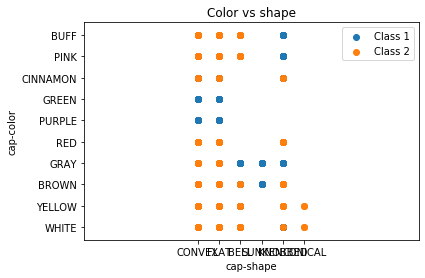

In [46]:
plotXY(X[["cap-shape","cap-color"]].values,y['class'].values)
plt.xlabel('cap-shape')
plt.ylabel('cap-color')
plt.title('Color vs shape')

Another idea could be translating the classes to numerical data. This way we could try linear regression methods.
> Of course it may make no sense, if the outcome is 'between' labels, but it can yield sense in a way, as some classes are more fluid than others (i.E. colors: A mushroom can be in between yellow and white (beeing bright yellow))
>
>Even though we have no data on this level of accuracy, we might build a regression model that supports it.

Also we could use correlation methods i.e. Pearsons Correlation to identify correlations between classes, this way we might find correlations that are not visible or more than 2-Dimensional.


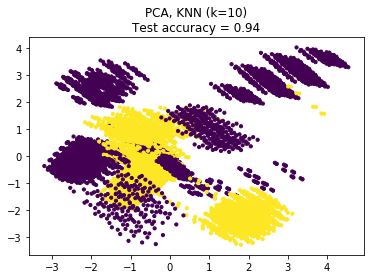

In [86]:
# PCA
y_labels = y_enc.astype(int).values[:,-1]
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_neighbors = 10
random_state = 42

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.8, stratify=y_labels,
                     random_state=random_state)

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
plt.figure()
pca.fit(X_train, y_train)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(pca.transform(X_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(pca.transform(X_test), y_test)

# Embed the data set in 2 dimensions using the fitted model
X_embedded = pca.transform(X_enc)

# Plot the projected points and show the evaluation score
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_labels, s=10)
plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format('PCA', n_neighbors, acc_knn))
plt.show()

This looks like knn gives us a good fitting method for testing additional samples. 
The benefit is that knn works also on smaller dimensions. (IE. if we only have 3-4 dimensions of information from a new mushroom, that we want to classify now)




## Reference

(1) Metzler S. Metzler V. Orson K. Texas Mushrooms. University of Texas Press. Austin. https://books.google.cz/books?id=HRtfvVigMmsC&pg=PA37&redir_esc=y#v=onepage&q&f=false <br>
(2) Haytowitz. Vitamin D in Mushrooms. Nutrient Data Laboratory, Beltsville Human Nutrition Research Center. <br>
(3) Indiana State Parks - Common Mushrooms <br>
(4) British Fungi - Elementary Text-Book <br>
(5) https://www.usask.ca/biology/fungi/home_%20page.shtml